In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import torch 
print(torch.__version__)

2.3.0+cu121


**PROJECT 1 TESTING OF FCC DATA ANALYTICS**

In [5]:
def calculations(list):
    try:
        if len(list) >= 9:
            matrix = np.array(list).reshape(3, 3)
            dictionary = {
                'mean': [matrix.mean(axis=0).tolist(), matrix.mean(axis=1).tolist(), matrix.mean().tolist()],
                'variance': [matrix.var(axis=0).tolist(), matrix.var(axis=1).tolist(), matrix.var().tolist()],
                'standard deviation': [matrix.std(axis=0).tolist(), matrix.std(axis=1).tolist(), matrix.std().tolist()],
                'max': [matrix.max(axis=0).tolist(), matrix.max(axis=1).tolist(), matrix.max().tolist()],
                'min': [matrix.min(axis=0).tolist(), matrix.min(axis=1).tolist(), matrix.min().tolist()],
                'sum': [matrix.sum(axis=0).tolist(), matrix.sum(axis=1).tolist(), matrix.sum().tolist()]
            }
            return dictionary
    except ValueError:
        print("List must contain nine numbers.") 

In [6]:
calculations([2,6,2,8,4,0,1,5,7])

{'mean': [[3.6666666666666665, 5.0, 3.0],
  [3.3333333333333335, 4.0, 4.333333333333333],
  3.888888888888889],
 'variance': [[9.555555555555557, 0.6666666666666666, 8.666666666666666],
  [3.555555555555556, 10.666666666666666, 6.222222222222221],
  6.987654320987654],
 'standard deviation': [[3.091206165165235,
   0.816496580927726,
   2.943920288775949],
  [1.8856180831641267, 3.265986323710904, 2.494438257849294],
  2.6434171674156266],
 'max': [[8, 6, 7], [6, 8, 7], 8],
 'min': [[1, 4, 0], [2, 0, 1], 0],
 'sum': [[11, 15, 9], [10, 12, 13], 35]}

In [4]:
expected = {'mean': [[3.6666666666666665, 5.0, 3.0], [3.3333333333333335, 4.0, 4.333333333333333], 3.888888888888889], 'variance': [[9.555555555555557, 0.6666666666666666, 8.666666666666666], [3.555555555555556, 10.666666666666666, 6.222222222222221], 6.987654320987654], 'standard deviation': [[3.091206165165235, 0.816496580927726, 2.943920288775949], [1.8856180831641267, 3.265986323710904, 2.494438257849294], 2.6434171674156266], 'max': [[8, 6, 7], [6, 8, 7], 8], 'min': [[1, 4, 0], [2, 0, 1], 0], 'sum': [[11, 15, 9], [10, 12, 13], 35]}
expected

{'mean': [[3.6666666666666665, 5.0, 3.0],
  [3.3333333333333335, 4.0, 4.333333333333333],
  3.888888888888889],
 'variance': [[9.555555555555557, 0.6666666666666666, 8.666666666666666],
  [3.555555555555556, 10.666666666666666, 6.222222222222221],
  6.987654320987654],
 'standard deviation': [[3.091206165165235,
   0.816496580927726,
   2.943920288775949],
  [1.8856180831641267, 3.265986323710904, 2.494438257849294],
  2.6434171674156266],
 'max': [[8, 6, 7], [6, 8, 7], 8],
 'min': [[1, 4, 0], [2, 0, 1], 0],
 'sum': [[11, 15, 9], [10, 12, 13], 35]}

**PROJECT 2 FCC DATA ANALYTICS**

In [5]:
def calculate_demographic_data(print_data=True):
    # Read data from file
    df = pd.read_csv('C:\\Belajar Kode\\FreeCodeCamp\\Data Analytics\\adult.data.csv')

    # How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.
    race_count = df['race'].value_counts()
    race_count = race_count.tolist()

    # What is the average age of men?
    average_age_men = df[df['sex'] == 'Male']['age'].mean()
    average_age_men = average_age_men.round(1)

    # What is the percentage of people who have a Bachelor's degree?
    education_total = df['education'].count()
    bachelor_total = df['education'].value_counts().get('Bachelors', 0)
    percentage_bachelors = (bachelor_total/education_total) * 100

    # What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
    # What percentage of people without advanced education make more than 50K?

    # with and without `Bachelors`, `Masters`, or `Doctorate`
    higher_education = df[df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
    lower_education = df[df['education'].isin(['Bachelors', 'Masters', 'Doctorate']).eq(False)]

    # percentage with salary >50K
    advanced_education_above50 = higher_education[higher_education['salary'] == '>50K']
    percentage_above_edu_50 = ((len(advanced_education_above50) / len(higher_education)) * 100)
    higher_education_rich = round(percentage_above_edu_50, 1)
    
    low_edu_above50 = lower_education[lower_education['salary'] == '>50K']
    percentage_low_edu = (len(low_edu_above50) / len(lower_education) * 100)
    lower_education_rich = round(percentage_low_edu, 1)

    # What is the minimum number of hours a person works per week (hours-per-week feature)?
    min_work_hours = df['hours-per-week'].min()

    # What percentage of the people who work the minimum number of hours per week have a salary of >50K?
    num_min_workers = df[df['hours-per-week'] == df['hours-per-week'].min()]
    min_worker_50k = num_min_workers[num_min_workers['salary'] == '>50K']
    rich_percentage = (len(min_worker_50k) / len(num_min_workers)) * 100

    # What country has the highest percentage of people that earn >50K?
    highsalary = df[df['salary'] == '>50K']
    countrygroup = highsalary.groupby('native-country')
    percentage_by_country = (countrygroup.size() / df.groupby('native-country').size()) * 100
    highest_earning_country = percentage_by_country.idxmax()
    highest_earning_country_percentage = percentage_by_country.max().round(1)

    # Identify the most popular occupation for those who earn >50K in India.
    salary_high_india = df[(df['salary'] == '>50K') & (df['native-country'] == 'India')]
    popular_occupation = salary_high_india['occupation'].value_counts()
    top_IN_occupation = popular_occupation.idxmax()

    # DO NOT MODIFY BELOW THIS LINE

    if print_data:
        print("Number of each race:\n", race_count) 
        print("Average age of men:", average_age_men)
        print(f"Percentage with Bachelors degrees: {percentage_bachelors}%")
        print(f"Percentage with higher education that earn >50K: {higher_education_rich}%")
        print(f"Percentage without higher education that earn >50K: {lower_education_rich}%")
        print(f"Min work time: {min_work_hours} hours/week")
        print(f"Percentage of rich among those who work fewest hours: {rich_percentage}%")
        print("Country with highest percentage of rich:", highest_earning_country)
        print(f"Highest percentage of rich people in country: {highest_earning_country_percentage}%")
        print("Top occupations in India:", top_IN_occupation)

    return {
        'race_count': race_count,
        'average_age_men': average_age_men,
        'percentage_bachelors': percentage_bachelors,
        'higher_education_rich': higher_education_rich,
        'lower_education_rich': lower_education_rich,
        'min_work_hours': min_work_hours,
        'rich_percentage': rich_percentage,
        'highest_earning_country': highest_earning_country,
        'highest_earning_country_percentage':
        highest_earning_country_percentage,
        'top_IN_occupation': top_IN_occupation
    }


**PROJECT 3 OF MEDICAL ANALYSIS**

In [6]:
# Import data
df = pd.read_csv('C:\Belajar Kode\FreeCodeCamp\Data Analytics\medical_examination.csv')

# Add 'overweight' column
def calculate_bmi(height, weight):
    # Convert height to meters
    height_meters = height / 100
    # Calculate BMI
    bmi = weight / (height_meters ** 2)
    return bmi

df['bmi'] = df.apply(lambda row: calculate_bmi(row['height'], row['weight']), axis=1)
df['bmi'] = df['bmi'].round(1)

bmi_threshold = 25
df['overweight'] = df['bmi'].apply(lambda x: 1 if x > 25 else 0 )

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    selected_columns = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
    df_cat = pd.melt(df, id_vars=['id', 'cardio'], value_vars=selected_columns, var_name='variable', value_name='value')

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='count')
    
    # Draw the catplot with 'sns.catplot()'
    sns.catplot(x='variable', hue='value', col='cardio', y='count', 
                data=df_cat, kind='bar', height=5, aspect=1.2)
    
    plt.show()

    # Get the figure for the output
    #fig = plt.gcf() 

    # Do not modify the next two lines
    #fig.savefig('catplot.png')
    #return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df
    df_heat = df_heat[df_heat['ap_lo'] <= df_heat['ap_hi']]

    df_heat = df_heat[df_heat['height'] >= df_heat['height'].quantile(0.025)]
    df_heat = df_heat[df_heat['height'] <= df_heat['height'].quantile(0.975)]

    df_heat = df_heat[df_heat['weight'] >= df_heat['weight'].quantile(0.025)]
    df_heat = df_heat[df_heat['weight'] <= df_heat['weight'].quantile(0.975)]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 8))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", cmap='icefire', 
                vmax=0.24, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

    # Do not modify the next two lines
    #fig.savefig('heatmap.png')
    #return fig


**PROJECT 4 FREECODECAMP DATA ANALYSIS**

In [7]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [8]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('C:\\Belajar Kode\\FreeCodeCamp\\Data Analytics\\fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index(df['date'])
df = df.drop(['date'], axis=1)

# Clean data
df = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]

def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(15,6))
    ax.plot(df.index, df[df.columns[0]], color='red', label=df.columns[0])
    
    # Set the title and labels
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    plt.xticks(rotation=45)
    #plt.tight_layout()
    #plt.show()

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['Month'] = df_bar.index.month
    df_bar['Year'] = df_bar.index.year
    df_bar = df_bar.groupby(['Year', 'Month']).mean().round(0).reset_index()

    #Change month into name rather than numbers
    import calendar
    df_bar['Month'] = df_bar['Month'].apply(lambda x: calendar.month_name[int(x)])
    df_bar['Month'] = pd.Categorical(df_bar['Month'], categories=['January', 'February', 'March', 'April', 'May', 
                                                                'June', 'July', 'August', 'September', 'October',
                                                                'November', 'December'], ordered=True)
    df_bar

    # Draw bar plot
    fig, ax = plt.subplots(figsize=(15, 6))

    # Plot the bar chart and set color
    pal = sns.color_palette("magma", len(df_bar['Month'].unique()))
    sns.barplot(x='Year', y='value', hue='Month', data=df_bar, palette = pal, ci=None, ax=ax)

    # Set labels and title
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.set_title('Average Daily Page Views per Month by Year')

    # Set legend title and position
    ax.legend(title='Months', loc='upper left')

    # Show plot
    #plt.tight_layout()
    #plt.show()

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    df_box['month'] = pd.Categorical(df_box['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                                                              'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 
                                                              'Nov', 'Dec'], ordered=True)

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Plot the first box plot on the first subplot
    palette_axes0 = sns.color_palette("seismic", len(df_box['year'].unique()))
    sns.boxplot(x='year', y='value', data=df_box, palette=palette_axes0, ax=axes[0])

    # Set the title for the first subplot
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    #Plot second boxplot
    palette_axes1 = sns.color_palette()
    sns.boxplot(x='month', y='value', data=df_box, palette= palette_axes1, ax=axes[1])

    # Set the title for the second subplot
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Adjust layout and show plot
    #plt.tight_layout()
    #plt.show()

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


**PROJECT 5**

In [9]:
from scipy.stats import linregress

In [10]:
def draw_plot():
    # Read data from file
    data = pd.read_csv('C:\\Belajar Kode\\FreeCodeCamp\\Data Analytics\\epa-sea-level.csv') 
    years = data["Year"]
    sea_level = data["CSIRO Adjusted Sea Level"]

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(years, sea_level, label='Sea Level')
    plt.xlabel("Year")
    plt.ylabel("Sea Level (inches)")
    plt.title("Rise in Sea Level")

    # Create first line of best fit
    slope, intercept, r_value, p_value, std_err = linregress(years, sea_level)
    x_all = range(1880, 2051)  # Extend x-axis to include 2050
    plt.plot(x_all, intercept + slope * x_all, 'r', label='Line of Best Fit')

    # Create second line of best fit
    recent_data = data[data["Year"] >= 2000]
    recent_years = recent_data["Year"]
    recent_sea_level = recent_data["CSIRO Adjusted Sea Level"]
    slope_recent, intercept_recent, r_value_recent, p_value_recent, std_err_recent = linregress(
        recent_years, recent_sea_level
    )
    x_recent = range(2000, 2051)
    plt.plot(x_recent, intercept_recent + slope_recent * x_recent, 'g', label='Line of Best Fit (2000)')

    # Add labels and title
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

C:\Users\razia\AppData\Local\Temp\ipykernel_7720\1098989202.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='value', hue='Month', data=df_grouped, ci=None)


AttributeError: module 'seaborn' has no attribute 'xlabel'

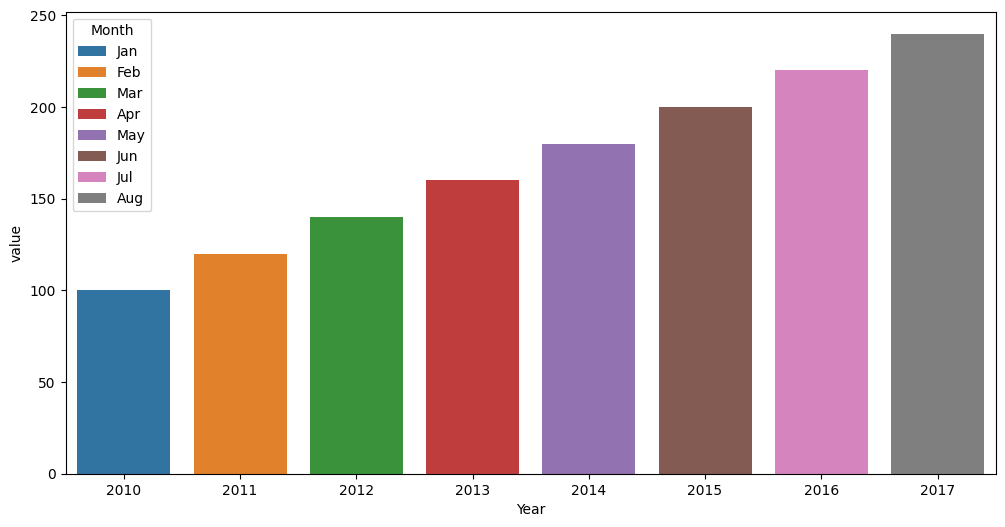

In [15]:
# Create a sample DataFrame
df = pd.DataFrame({'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], 'value': [100, 120, 140, 160, 180, 200, 220, 240], 'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']})

# Group the data by Year and Month
df_grouped = df.groupby(['Year', 'Month']).mean().reset_index()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create a barplot
sns.barplot(x='Year', y='value', hue='Month', data=df_grouped, ci=None)

# Set labels and title
sns.xlabel('Years')
sns.ylabel('Average Page Views')
sns.title('Average Daily Page Views per Month by Year')

# Set legend title and position
sns.legend(title='Months', loc='upper left')

# Show plot
plt.tight_layout()
plt.show()